# Cargamos los datos


In [2]:
import pandas as pd 
import numpy as np
from scipy.stats import kstest
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://storage.googleapis.com/the_public_bucket/wine-clustering.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Verificamos los tipos de datos, cantidad de nulos y duplicados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


Sabemos que la minoría (2 atributos) son de tipo entero y el resto de tipo float

In [15]:
df[df.duplicated()]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [5]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# ANÁLISIS UNIVARIADO

### Aplicamos gráficos de distribución y densidad para cada atributo

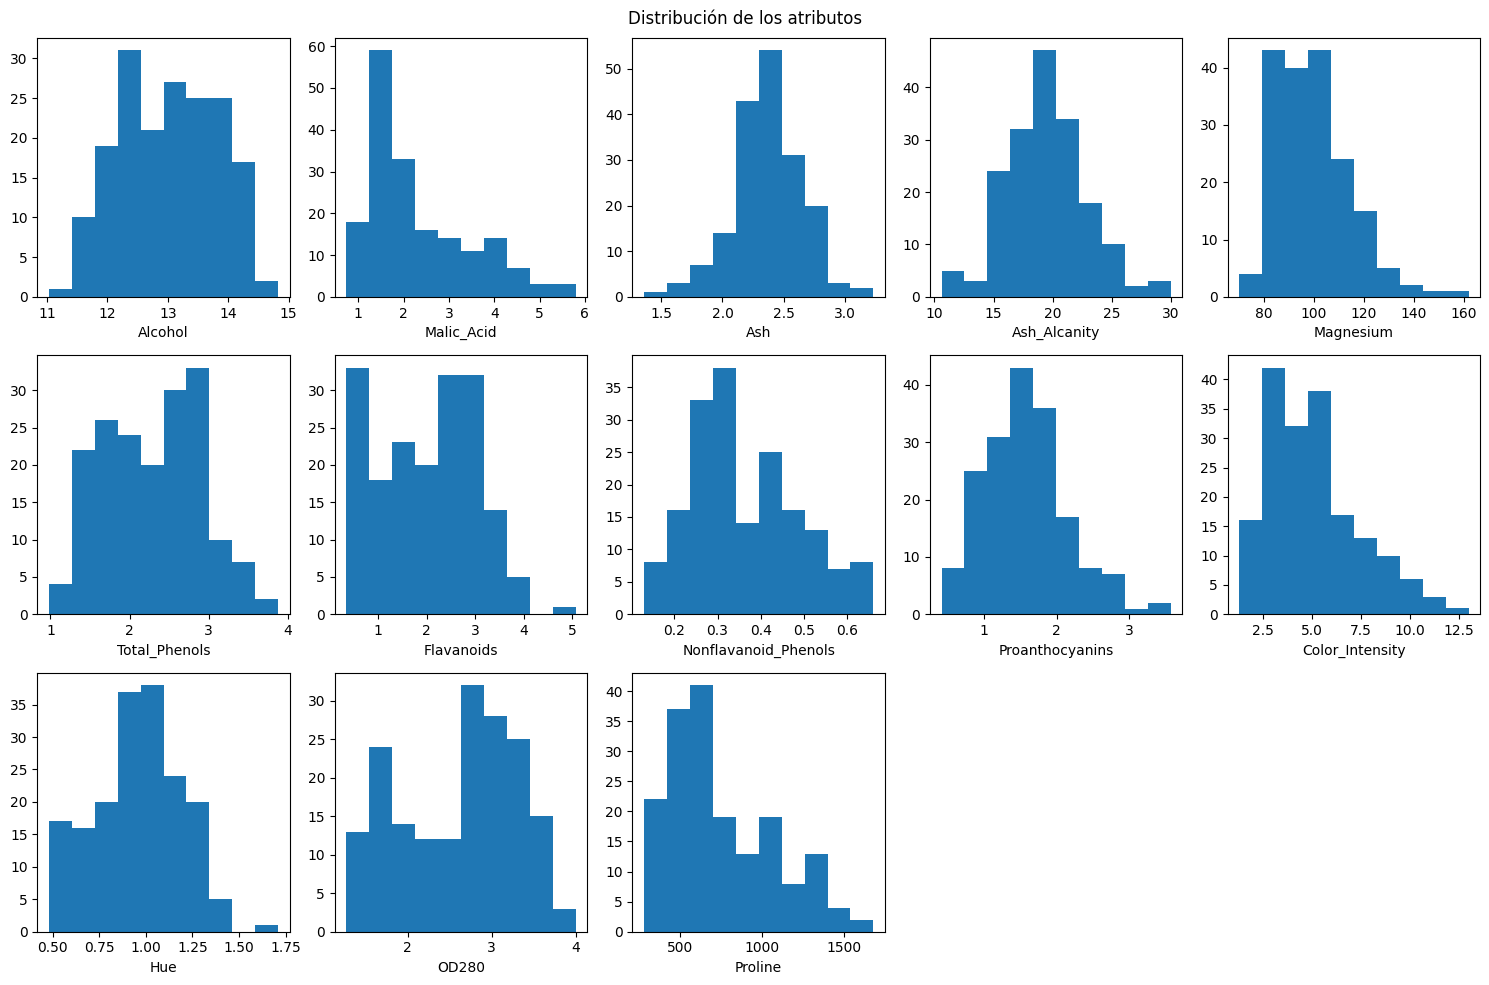

In [7]:
fig, axes = plt.subplots(3,5,figsize=(15, 10))
fig.suptitle('Distribución de los atributos')
a = 0
for i in range(3):
    for j in range(5):
        axes[i,j].hist(df[df.columns[a]])
        axes[i,j].set_xlabel(df.columns[a])
        if a >=12:
            break
        else:
            a = a+1
fig.delaxes(axes[2,3])
fig.delaxes(axes[2,4])
plt.tight_layout()

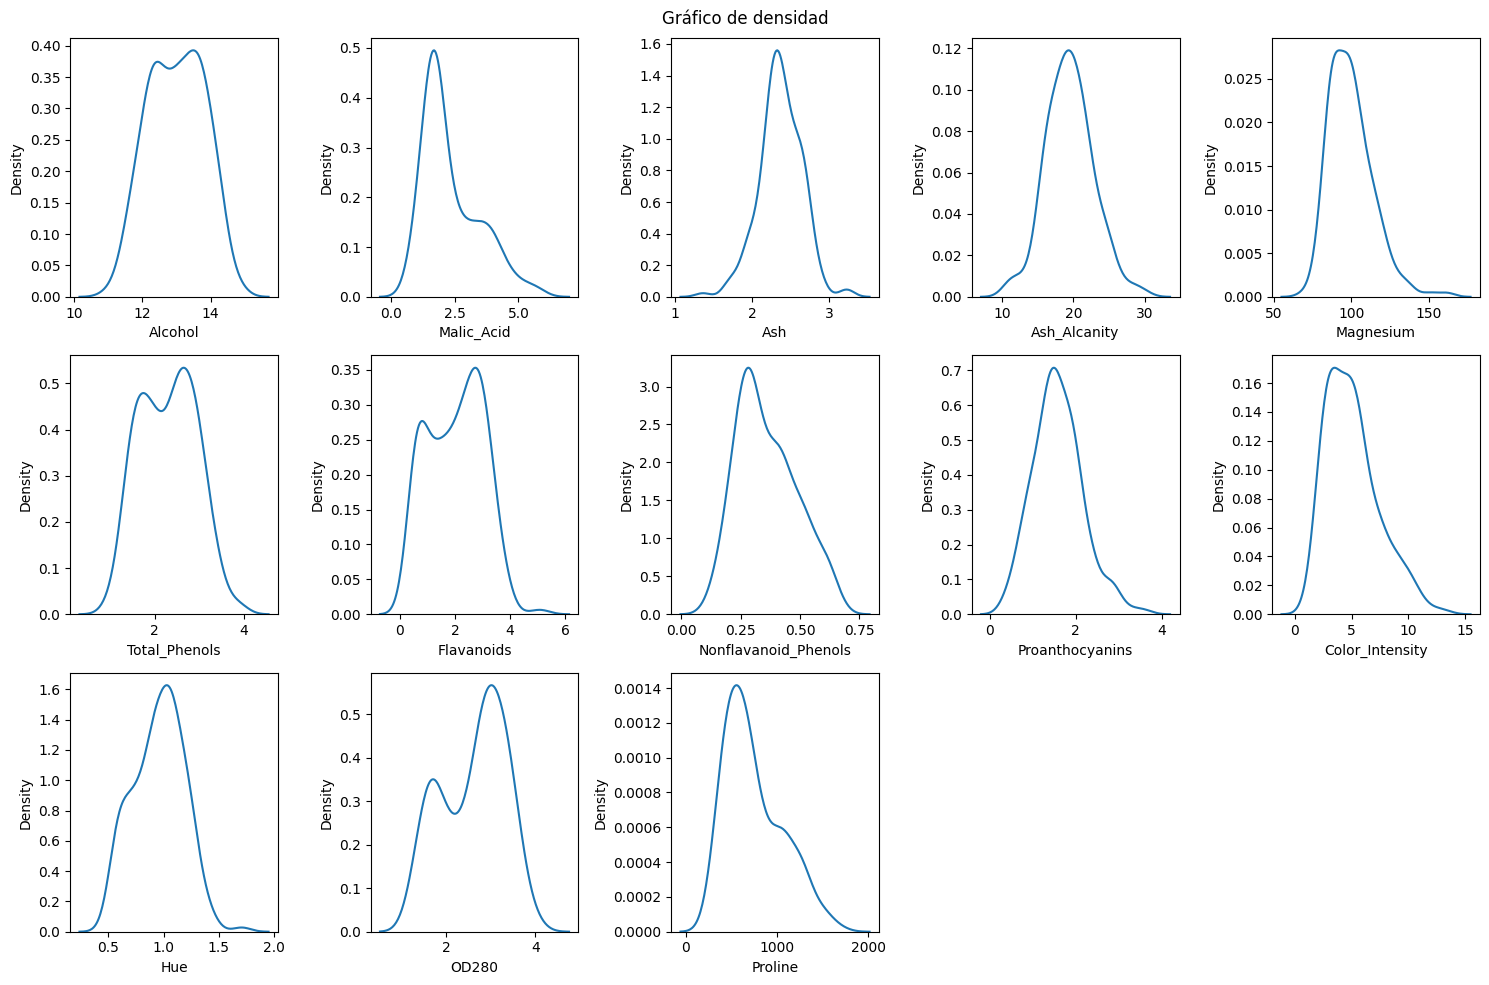

In [8]:
fig, axes = plt.subplots(3,5,figsize=(15, 10))
fig.suptitle('Gráfico de densidad')
a = 0
for i in range(3):
    for j in range(5):
        sns.kdeplot(df[df.columns[a]], ax=axes[i, j])
        axes[i,j].set_xlabel(df.columns[a])
        if a >=12:
            break
        else:
            a = a+1
fig.delaxes(axes[2,3])
fig.delaxes(axes[2,4])
plt.tight_layout()

## Verificamos si existe algún atributo con distribución normal

In [10]:
for column in df.columns:
    stat, p_value = kstest(df[column], 'norm')
    print(f'Variable: {column}, Estadístico KS: {stat}, Valor p: {p_value}')

Variable: Alcohol, Estadístico KS: 1.0, Valor p: 0.0
Variable: Malic_Acid, Estadístico KS: 0.8076490794347374, Valor p: 2.1960240394690393e-126
Variable: Ash, Estadístico KS: 0.9498165597133671, Valor p: 1.0018155238058492e-231
Variable: Ash_Alcanity, Estadístico KS: 1.0, Valor p: 0.0
Variable: Magnesium, Estadístico KS: 1.0, Valor p: 0.0
Variable: Total_Phenols, Estadístico KS: 0.8777841433940587, Valor p: 8.681887443863269e-163
Variable: Flavanoids, Estadístico KS: 0.6752045136893543, Valor p: 8.643713578290513e-81
Variable: Nonflavanoid_Phenols, Estadístico KS: 0.5517167866545611, Valor p: 1.9423391745250152e-51
Variable: Proanthocyanins, Estadístico KS: 0.7263468486076146, Valor p: 3.854266338273704e-96
Variable: Color_Intensity, Estadístico KS: 0.9600474851278183, Valor p: 2.376203808156616e-249
Variable: Hue, Estadístico KS: 0.6997835062562121, Valor p: 6.95750941666965e-88
Variable: OD280, Estadístico KS: 0.8979576849251809, Valor p: 7.828997166354755e-177
Variable: Proline, Est

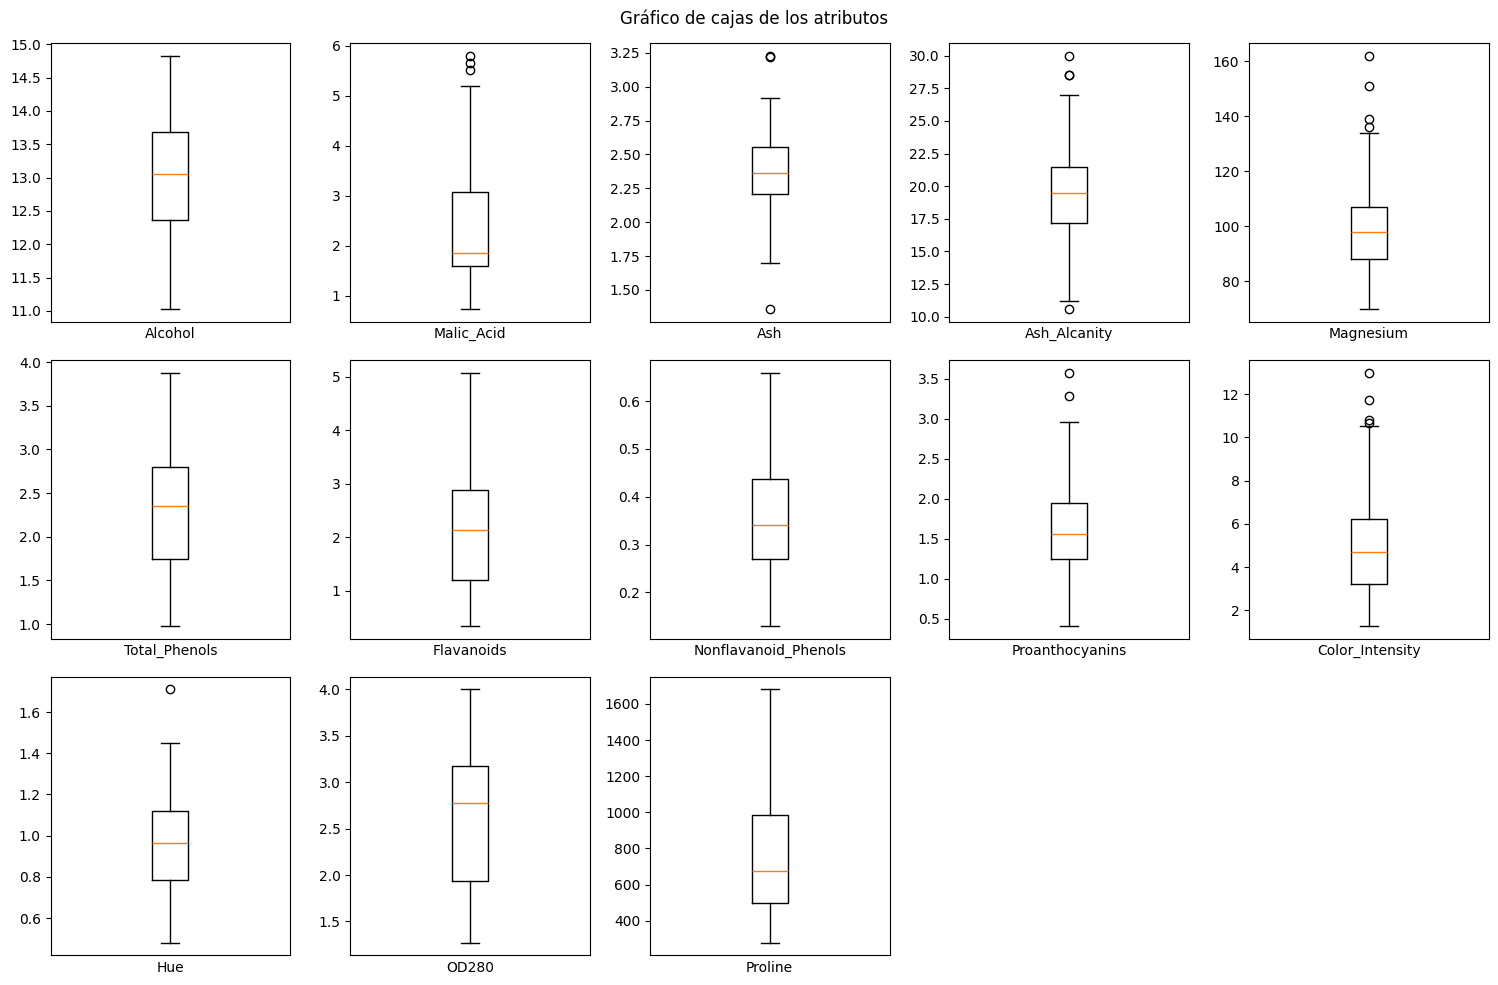

In [11]:
fig, axes = plt.subplots(3,5,figsize=(15, 10))
fig.suptitle('Gráfico de cajas de los atributos')
a = 0
for i in range(3):
    for j in range(5):
        axes[i,j].boxplot(df[df.columns[a]])
        axes[i,j].set_xlabel(df.columns[a])
        axes[i,j].set_xticks([])
        if a >=12:
            break
        else:
            a = a+1
fig.delaxes(axes[2,3])
fig.delaxes(axes[2,4])
plt.tight_layout()

## Verificamos la escala de los datos

In [12]:
df.var()

Alcohol                     0.659062
Malic_Acid                  1.248015
Ash                         0.075265
Ash_Alcanity               11.152686
Magnesium                 203.989335
Total_Phenols               0.391690
Flavanoids                  0.997719
Nonflavanoid_Phenols        0.015489
Proanthocyanins             0.327595
Color_Intensity             5.374449
Hue                         0.052245
OD280                       0.504086
Proline                 99166.717355
dtype: float64

Necesitaremos estandarizar los datos en el clustering

# ANÁLISIS BIVARIADO

# Buscamos correlaciones entre los atributos

### Podemos usar Heatmap o Pairplot. En este caso, estoy usando Heatmap para visualizar con facilidad la correlación

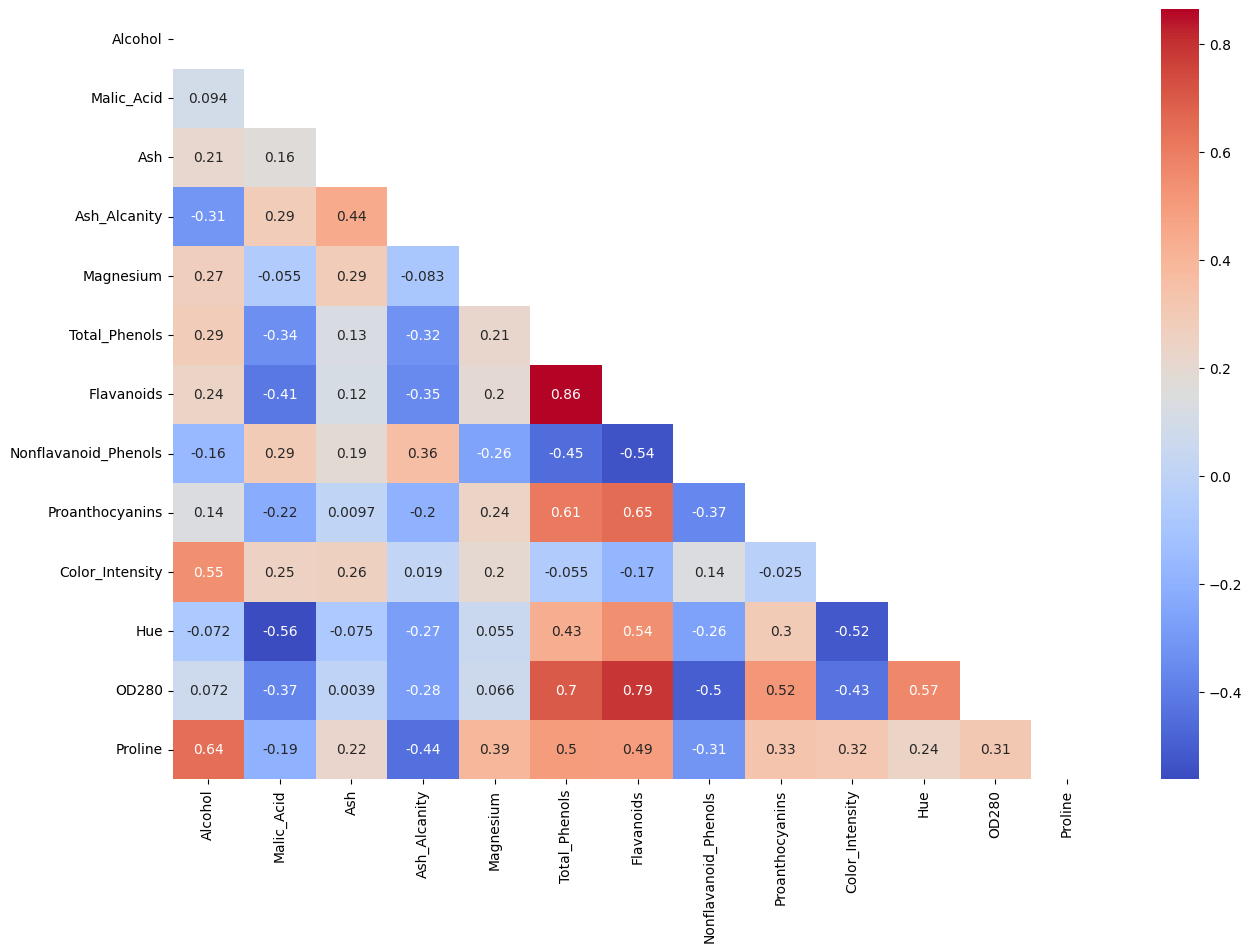

In [13]:
corr= df.corr()
matrix = np.triu(corr)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True,cmap='coolwarm',linecolor='black', mask=matrix)
plt.show()

👉Podemos observar que existe una alta correlación entre **Total_Phenols** y **Flavanoids**

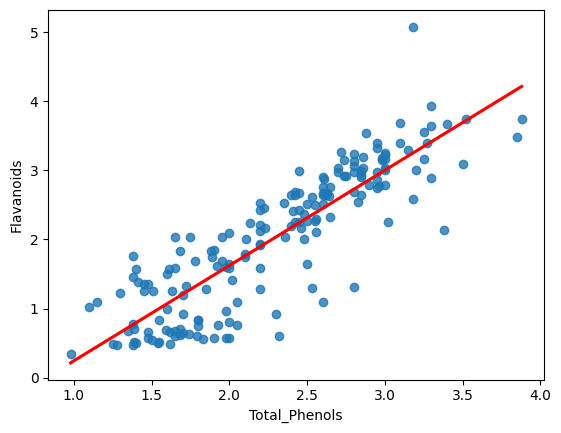

In [14]:
sns.regplot(df,x='Total_Phenols',y='Flavanoids',fit_reg=True,ci=None,line_kws={'color':'red'})
plt.show()

conclusion